<a href="https://colab.research.google.com/github/HosseinSharifi1380/Master_Project/blob/main/Master_Project_Multimodal_BG_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount Google Drive


In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Do this for the first time :  Download full dataset and copy it in Google Drive

In [ ]:
import os

# Create a directory in Google Drive
save_dir = "/content/drive/MyDrive/PhysioCGM"
os.makedirs(save_dir, exist_ok=True)

# List of ZIP download links
file_urls = {
    "c1s01_processed.zip": "https://springernature.figshare.com/ndownloader/files/51655652",
    "c1s02_processed.zip": "https://springernature.figshare.com/ndownloader/files/51656123",
    "c1s03_processed.zip": "https://springernature.figshare.com/ndownloader/files/51656129",
    "c1s04_processed.zip": "https://springernature.figshare.com/ndownloader/files/51656141",
    "c1s05_processed.zip": "https://springernature.figshare.com/ndownloader/files/51656147",
    "c2s01_processed.zip": "https://springernature.figshare.com/ndownloader/files/51656177",
    "c2s02_processed.zip": "https://springernature.figshare.com/ndownloader/files/51656189",
    "c2s03_processed.zip": "https://springernature.figshare.com/ndownloader/files/51656204",
    "c2s04_processed.zip": "https://springernature.figshare.com/ndownloader/files/51656228",
    "c2s05_processed.zip": "https://springernature.figshare.com/ndownloader/files/51656246"
}

# Download loop
for filename, url in file_urls.items():
    output_path = os.path.join(save_dir, filename)
    print(f"\nDownloading {filename} ...")

    !wget --continue \
        -O "$output_path" \
        --header="User-Agent: Mozilla/5.0" \
        "$url"

    print("Saved:", output_path)


print("\nAll downloads finished successfully.")


--2026-02-17 20:42:50--  https://springernature.figshare.com/ndownloader/files/51655652
Resolving springernature.figshare.com (springernature.figshare.com)... 52.18.117.133, 52.51.238.194, 52.51.0.47, ...
Connecting to springernature.figshare.com (springernature.figshare.com)|52.18.117.133|:443... connected.
HTTP request sent, awaiting response... 202 Accepted
Length: 0 [text/html]
Saving to: ‘/content/drive/MyDrive/PhysioCGM/c1s01_processed.zip’

/content/drive/MyDr     [ <=>                ]       0  --.-KB/s    in 0s      

Saved: /content/drive/MyDrive/PhysioCGM/c1s01_processed.zip

--2026-02-17 20:42:51--  https://springernature.figshare.com/ndownloader/files/51656123
Resolving springernature.figshare.com (springernature.figshare.com)... 52.18.117.133, 52.51.238.194, 52.51.0.47, ...
Connecting to springernature.figshare.com (springernature.figshare.com)|52.18.117.133|:443... connected.
HTTP request sent, awaiting response... 202 Accepted
Length: 0 [text/html]
Saving to: ‘/content

In [ ]:
!ls /content/drive/MyDrive/PhysioCGM/

# imports

In [3]:
import zipfile
import os
import pickle
import io

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd

from scipy.signal import butter, lfilter, filtfilt, welch, iirnotch
!pip install neurokit2
import neurokit2 as nk


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 708.4/708.4 kB 17.6 MB/s eta 0:00:00


# Contents of first Zip file "c1s01_processed.zip"

In [4]:
zip_path = "/content/drive/MyDrive/PhysioCGM/c1s01_processed.zip"
contents = []
with zipfile.ZipFile(zip_path, 'r') as z:

  file_count = len(z.namelist())
  print("Number of files inside ZIP:", file_count)
  print("-" * 40)

  print("Files inside ZIP (first 7 files) : ")
  contents = z.namelist()
  print(contents[:7])
  print("-" * 40)


  total_uncompressed = 0
  total_compressed = 0
  for info in z.infolist():
    total_uncompressed += info.file_size
    total_compressed += info.compress_size

  print("Total uncompressed size (GB):", total_uncompressed / (1024**3))
  print("Total compressed size (GB)  :", total_compressed / (1024**3))


Number of files inside ZIP: 2704
----------------------------------------
Files inside ZIP (first 7 files) : 
['0.pkl', '1.pkl', '10.pkl', '100.pkl', '1000.pkl', '1001.pkl', '1002.pkl']
----------------------------------------
Total uncompressed size (GB): 7.087190943770111
Total compressed size (GB)  : 1.2058935686945915


# contents of first .pkl file in the "c1s01_processed.zip"

In [5]:
with zipfile.ZipFile(zip_path, 'r') as z:
    with z.open("1664.pkl", "r") as f:
        data = pickle.load(f)   # load directly from ZIP
        print("pkl file type : ",type(data))
        print(data.keys())
        print("Type of each key : ")
        print("-" * 40)

        print(type(data['Index']))
        print(type(data['Timestamp']))
        print(type(data['glucose']))
        print(type(data['zephyr']))
        print(type(data['e4']))
        print("-" * 40)


        print("zephyr keys :",data['zephyr'].keys())
        print("zephyr ECG keys :",data['zephyr']['ECG'].keys())
        print("zephyr Summary keys :",data['zephyr']['Summary'].keys())
        print("-" * 40)

        print("E4 keys :",data['e4'].keys())
        print("E4 BVP keys :",data['e4']['BVP'].keys())
        # print(data['zephyr']['Summary'].keys())
        # print("-" * 40)



pkl file type :  <class 'dict'>
dict_keys(['Index', 'Timestamp', 'glucose', 'zephyr', 'e4'])
Type of each key : 
----------------------------------------
<class 'numpy.float64'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'numpy.float64'>
<class 'dict'>
<class 'dict'>
----------------------------------------
zephyr keys : dict_keys(['Accel', 'Breathing', 'ECG', 'Summary'])
zephyr ECG keys : dict_keys(['Time', 'EcgWaveform'])
zephyr Summary keys : dict_keys(['Time', 'HR', 'BR', 'Posture', 'Activity', 'HRConfidence', 'ECGNoise'])
----------------------------------------
E4 keys : dict_keys(['ACC', 'HR', 'BVP', 'EDA', 'TEMP'])
E4 BVP keys : dict_keys(['Time', 'BVP'])


# Total Recording Duration of Synchronized Signals (takes a long time)

In [ ]:
####################################
def load_pkl_from_zip(z, file_name):
    # Read a single .pkl member from an already-open ZipFile object
    with z.open(file_name) as f:
        data = pickle.load(f)
    return data

####################################
def duration_minutes(time_arr):

    if time_arr is None:
        return None
    if len(time_arr) == 0:
        return None
    t0 = time_arr[0]    # first time
    t1 = time_arr[-1]   # last time
    duration_min = (t1 - t0) / np.timedelta64(1, 'm')
    return float(duration_min)

####################################
def total_duration_for_zip_file(zip_path, print_per_file=True):

  durations = []

  with zipfile.ZipFile(zip_path, 'r') as z:

    for name in z.namelist():
      data = load_pkl_from_zip(z,name)
      ecg_time = data['zephyr']['ECG']['Time']
      dmin = duration_minutes(ecg_time)
      dmin = round(dmin, 2)
      durations.append(dmin)
      if print_per_file :
        print(name, "=>", f"{dmin:.2f}", "min")


  total = sum(durations)

  print("TOTAL =>", f"{total:.2f}", "min")
  return durations, total

####################################
def total_duration_for_multiple_zip_files(zip_paths, print_per_file=False):
    # Compute total duration per zip and grand total across multiple zips
    results = []
    grand_total = 0.0

    for zp in zip_paths:
        durations, total = total_duration_for_zip_file(zp, print_per_file=print_per_file)

        results.append({
            "zip_path": zp,
            "num_pkl_files_used": len(durations),
            "total_min": round(total, 2),  # store as 2 decimals if you want
        })

    print("-" * 60)

    return results

####################################
# test
zip_paths = [
    "/content/drive/MyDrive/PhysioCGM/c1s01_processed.zip",
    "/content/drive/MyDrive/PhysioCGM/c1s02_processed.zip",
    "/content/drive/MyDrive/PhysioCGM/c1s03_processed.zip",
    "/content/drive/MyDrive/PhysioCGM/c1s04_processed.zip",
    "/content/drive/MyDrive/PhysioCGM/c1s05_processed.zip",
    "/content/drive/MyDrive/PhysioCGM/c2s01_processed.zip",
    "/content/drive/MyDrive/PhysioCGM/c2s02_processed.zip",
    "/content/drive/MyDrive/PhysioCGM/c2s03_processed.zip",
    "/content/drive/MyDrive/PhysioCGM/c2s04_processed.zip"
]

result = total_duration_for_multiple_zip_files(zip_paths)



# work with ECG

## Show a part of ECG which we want to work with it

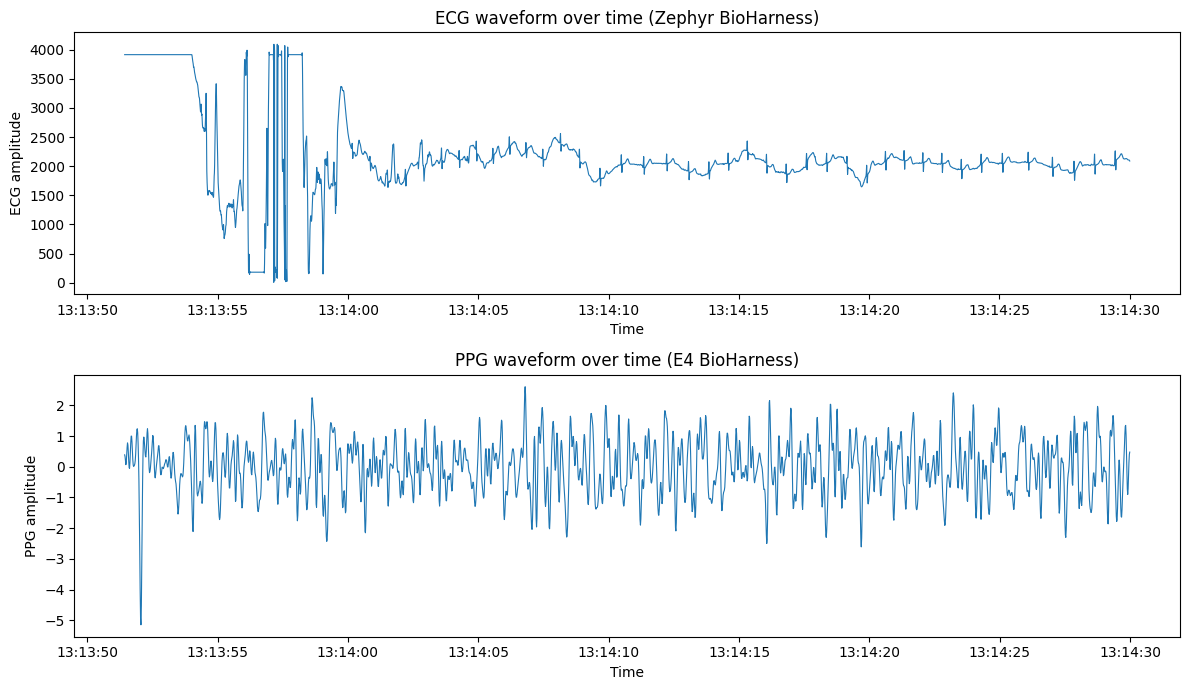

In [6]:
ecg_time = pd.to_datetime(data['zephyr']['ECG']['Time'])
ecg_time = pd.to_datetime(ecg_time)

ecg_raw = data['zephyr']['ECG']['EcgWaveform']

plt.figure(figsize=(12,7))
plt.subplot(2,1,1)
plt.plot(ecg_time, ecg_raw, linewidth=0.8)

plt.title("ECG waveform over time (Zephyr BioHarness)")
plt.xlabel("Time")
plt.ylabel("ECG amplitude")


ppg_time = pd.to_datetime(data['e4']['BVP']['Time'])
ppg_time = pd.to_datetime(ppg_time)
ppg_raw = data['e4']['BVP']['BVP']

plt.subplot(2,1,2)
plt.plot(ppg_time, ppg_raw, linewidth=0.8)
plt.title("PPG waveform over time (E4 BioHarness)")
plt.xlabel("Time")
plt.ylabel("PPG amplitude")
plt.tight_layout()
plt.show()


## Find bad segments(saturation, plateau, motion artifact)

In [ ]:
def _runs_of_true(mask: np.ndarray):
    """
    Return list of (start, end) index pairs for contiguous True regions in a boolean mask.
    end is exclusive.
    """
    mask = np.asarray(mask, dtype=bool)
    if mask.size == 0:
        return []

    # Find changes: False->True or True->False
    diff = np.diff(mask.astype(np.int8))
    starts = np.where(diff == 1)[0] + 1
    ends   = np.where(diff == -1)[0] + 1

    # Handle if mask starts/ends with True
    if mask[0]:
        starts = np.r_[0, starts]
    if mask[-1]:
        ends = np.r_[ends, mask.size]

    return list(zip(starts.tolist(), ends.tolist()))


def detect_clipping_plateaus(
    x:                np.ndarray,
    fs:               float | None = None,
    min_plateau_sec:  float = 0.20,
    min_sat_sec:      float = 0.15,
    eps_rel:          float = 0.002,
    adc_min:          float = 0,
    adc_max:          float = 4095,
    sat_margin:       float = 0.05,
    pad_sec:          float = 0.05,
    k:                float = 9.0,
    win_sec:          float = 1.0,
    min_frac:         float = 0.02,
):
    """
    Detect 'bad' regions caused by clipping/saturation or long plateaus.

    Parameters
    ----------
    x : 1D numpy array
        Raw signal (ECG or PPG).
    fs : float or None
        Sampling rate. If None, durations are interpreted in samples using safe defaults.

    # ------------------------------------------
    min_plateau_sec : float
        Minimum plateau duration to be considered bad (seconds).
    min_sat_sec : float
        Minimum saturation duration (near extreme quantiles) to be considered bad (seconds).
    eps_rel : float
        Plateau tolerance as a fraction of robust scale (smaller => stricter plateau detection).
    ADC_low, ADC_high : float
        Minimum and Maximum of ADC values.
    pad_sec : float
        Expand detected bad regions by this padding (seconds) to also cover ringing/edges.
    # ------------------------------------------
    # --- Motion artifact parameters (added) ---
    k: float
        spike threshold multiplier on robust scale of |diff|
    win_sec: float
        moving window length (seconds) for spike density
    min_frac: float
        minimum spike fraction within window to mark motion

    Returns
    -------
    bad_mask : 1D boolean array
        True where the signal is considered bad (clipped/plateau/saturated).
    bad_segments : list of (start, end)
        Contiguous bad segments in sample indices, end is exclusive.
    info : dict
        Useful thresholds and intermediate masks for debugging.
    """
    x = np.asarray(x).astype(np.float64)
    n = x.size
    if n == 0:
        return np.zeros(0, dtype=bool), [], {}

    # Convert seconds to samples (fallback to reasonable sample counts if fs is unknown)
    min_plateau_len = max(3, int(round(min_plateau_sec * fs)))
    min_sat_len     = max(3, int(round(min_sat_sec * fs)))
    pad             = max(0, int(round(pad_sec * fs)))
    motion_win      = max(5, int(round(win_sec * fs)))
    min_motion_len  = max(3, int(round(0.25 * fs)))        # fixed 0.25s minimum motion duration

    # Robust scale for adaptive epsilon (MAD-based)
    med = np.median(x)
    mad = np.median(np.abs(x - med))
    robust_scale = 1.4826 * mad
    if robust_scale < 1e-12:
        robust_scale = np.std(x) + 1e-12

    eps = eps_rel * robust_scale  # absolute tolerance for "almost constant"

    # --- 1) Plateau detection: consecutive differences are tiny for a long run ---
    dx = np.abs(np.diff(x))
    near_constant = dx <= eps  # length n-1
    # Expand to length n so mask aligns with samples
    plateau_candidate = np.r_[near_constant, False]

    plateau_mask = np.zeros(n, dtype=bool)
    for s, e in _runs_of_true(plateau_candidate):
        if (e - s) >= min_plateau_len:
            plateau_mask[s:e] = True

    # --- 2) Saturation-like detection: values stay near extreme quantiles for a while ---

    # A small margin because sometimes the signal doesn't hit exactly min/max
    margin = int(sat_margin * (adc_max - adc_min))
    near_extreme = (x <= adc_min + margin) | (x >= adc_max - margin)

    sat_mask = np.zeros(n, dtype=bool)
    for s, e in _runs_of_true(near_extreme):
        if (e - s) >= min_sat_len:
            sat_mask[s:e] = True


    # --- 3) Motion artifact detection: high spike density in |diff| ---
    motion_mask = np.zeros(n, dtype=bool)

    # Robust threshold for spikes in dx
    dx_med = np.median(dx)
    dx_mad = np.median(np.abs(dx - dx_med))
    dx_robust = 1.4826 * dx_mad
    if dx_robust < 1e-12:
        dx_robust = np.std(dx) + 1e-12

    thr_dx = dx_med + k * dx_robust

    # Spike indicator aligned to length n (1.0 where dx > thr_dx)
    spike = np.r_[dx > thr_dx, False].astype(np.float64)

    # Moving average of spike density within a window
    kernel = np.ones(motion_win, dtype=np.float64) / motion_win
    spike_density = np.convolve(spike, kernel, mode="same")

    # Candidate motion region where spike density is high
    motion_candidate = spike_density >= min_frac

    # Keep only sufficiently long motion segments (remove tiny blips)
    for s, e in _runs_of_true(motion_candidate):
        if (e - s) >= min_motion_len:
            motion_mask[s:e] = True



    # Combine bad masks
    bad_mask = plateau_mask | sat_mask | motion_mask

    # --- 4) Optional padding to cover edges around bad regions ---
    if pad > 0 and bad_mask.any():
        padded = bad_mask.copy()
        segments = _runs_of_true(bad_mask)
        for s, e in segments:
            s2 = max(0, s - pad)
            e2 = min(n, e + pad)
            padded[s2:e2] = True
        bad_mask = padded

    bad_segments = _runs_of_true(bad_mask)

    info = {
        "eps": eps,
        "robust_scale": robust_scale,
        "margin": margin,
        "plateau_mask": plateau_mask,
        "sat_mask": sat_mask,
        "motion_mask": motion_mask,
        "min_plateau_len": min_plateau_len,
        "min_sat_len": min_sat_len,
        "motion_win": motion_win,
        "min_motion_len": min_motion_len,
        "thr_dx": thr_dx,
        "pad": pad,
    }
    return bad_mask, bad_segments, info, motion_mask, sat_mask, plateau_mask


def remove_bad_regions(x: np.ndarray, bad_mask: np.ndarray):
    """
    Return a list of clean contiguous signal chunks after removing bad regions.
    Each chunk is a 1D numpy array.
    """
    x = np.asarray(x)
    bad_mask = np.asarray(bad_mask, dtype=bool)
    good_mask = ~bad_mask
    chunks = []
    for s, e in _runs_of_true(good_mask):
        chunks.append(x[s:e])
    return chunks


### Find Bad segments of ECG

In [ ]:
bad_mask, bad_segments, info, motion_mask, sat_mask, plateau_mask = detect_clipping_plateaus(
    ecg_raw,
    fs=250,

    eps_rel=0.005,
    min_plateau_sec=0.1,

    sat_margin=0.25,
    min_sat_sec=0.01,

    k=20,
    win_sec=1.0,
    min_frac=0.06,

    pad_sec=0.08
)


print("Bad segments (start, end):", bad_segments[:5])
ecg_clean_chunks = remove_bad_regions(ecg_raw, bad_mask)


ecg_bad = np.full_like(ecg_raw, np.nan, dtype=float)
ecg_bad_motion = np.full_like(ecg_raw, np.nan, dtype=float)
ecg_bad_plateau = np.full_like(ecg_raw, np.nan, dtype=float)
ecg_bad_sat = np.full_like(ecg_raw, np.nan, dtype=float)

ecg_bad_motion[motion_mask] = ecg_raw[motion_mask]
ecg_bad_plateau[plateau_mask] = ecg_raw[plateau_mask]
ecg_bad_sat[sat_mask] = ecg_raw[sat_mask]
ecg_bad[bad_mask] = ecg_raw[bad_mask]

plt.figure(figsize=(14, 4))
plt.plot(ecg_time, ecg_raw, linewidth=0.8, label="Raw ECG", alpha = 0.3)
# plt.plot(ecg_time, ecg_bad, linewidth=1.2, label="Bad regions (overlay)")
plt.plot(ecg_time, ecg_bad_motion, linewidth=0.8, label="Motion artifacts", color='r')
plt.plot(ecg_time, ecg_bad_plateau, linewidth=0.8, label="Plateaus", color = 'b')
plt.plot(ecg_time, ecg_bad_sat, linewidth=1.2, label="Saturation", color = 'pink')

plt.tight_layout()
plt.legend()
plt.show()


In [ ]:
_, _, _ , ppg_motion_mask, ppg_sat_mask, ppg_plateau_mask = detect_clipping_plateaus(
    ppg_raw, fs=64, eps_rel=0.005, adc_min=-100, min_plateau_sec=0.1, sat_margin=0.01, min_sat_sec=0.01, k=1.5, win_sec=0.01, min_frac=0.1, pad_sec=0.08)

ppg_bad = np.full_like(ppg_raw, np.nan, dtype=float)
ppg_bad_motion = np.full_like(ppg_raw, np.nan, dtype=float)
ppg_bad_plateau = np.full_like(ppg_raw, np.nan, dtype=float)
ppg_bad_sat = np.full_like(ppg_raw, np.nan, dtype=float)

ppg_bad_motion[ppg_motion_mask] = ppg_raw[ppg_motion_mask]
ppg_bad_plateau[ppg_plateau_mask] = ppg_raw[ppg_plateau_mask]
ppg_bad_sat[ppg_sat_mask] = ppg_raw[ppg_sat_mask]
# ppg_bad[bad_mask] = ppg_raw[bad_mask]

plt.figure(figsize=(14, 4))
plt.plot(ppg_time, ppg_raw, linewidth=0.8, label="Raw ECG", alpha = 0.3)
# plt.plot(ecg_time, ecg_bad, linewidth=1.2, label="Bad regions (overlay)")
plt.plot(ppg_time, ppg_bad_motion, linewidth=0.8, label="Motion artifacts", color='r')
plt.plot(ppg_time, ppg_bad_plateau, linewidth=0.8, label="Plateaus", color = 'b')
plt.plot(ppg_time, ppg_bad_sat, linewidth=1.2, label="Saturation", color = 'pink')

plt.tight_layout()
plt.legend()
plt.show()


## Effect of passband on PPG

In [7]:
!wget https://github.com/HosseinSharifi1380/Master_Project/raw/refs/heads/main/utils.py

--2026-02-20 17:23:20--  https://github.com/HosseinSharifi1380/Master_Project/raw/refs/heads/main/utils.py
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/HosseinSharifi1380/Master_Project/refs/heads/main/utils.py [following]
--2026-02-20 17:23:20--  https://raw.githubusercontent.com/HosseinSharifi1380/Master_Project/refs/heads/main/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13387 (13K) [text/plain]
Saving to: ‘utils.py’

utils.py            100%[===================>]  13.07K  --.-KB/s    in 0s      

2026-02-20 17:23:20 (100 MB/s) - ‘utils.py’ saved [13387/13387]



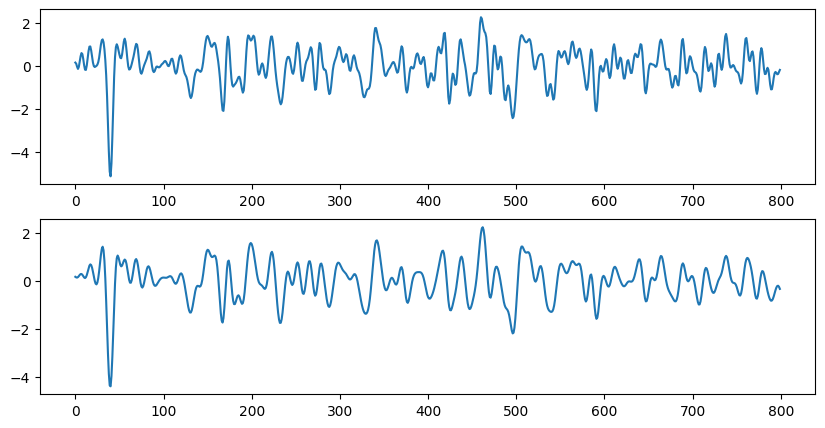

In [8]:
import utils

ppg_filtered = utils.bandpass(ppg_raw, 64, 0.5, 22)
plt.figure(figsize =(10,5))
plt.subplot(2,1,1)
plt.plot(ppg_filtered[:800])

ppg_filtered = utils.bandpass(ppg_raw, 64, 0.5, 6)
plt.subplot(2,1,2)
plt.plot(ppg_filtered[:800])

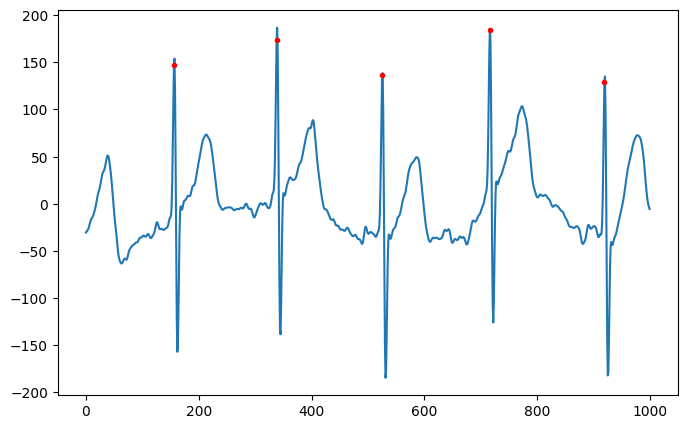

In [9]:
ecg_filt = utils.bandpass(ecg_raw, 250, 0.5, 40)
ecg_1 = ecg_filt[7500:8500]
signals, info = nk.ecg_process(ecg_1, sampling_rate=250)
rpeaks = info["ECG_R_Peaks"]

plt.figure(figsize=(8,5))
plt.plot(ecg_1)
plt.plot(rpeaks, ecg_1[rpeaks], 'r.')
plt.show()

## Find Bad segments using spectral analysis

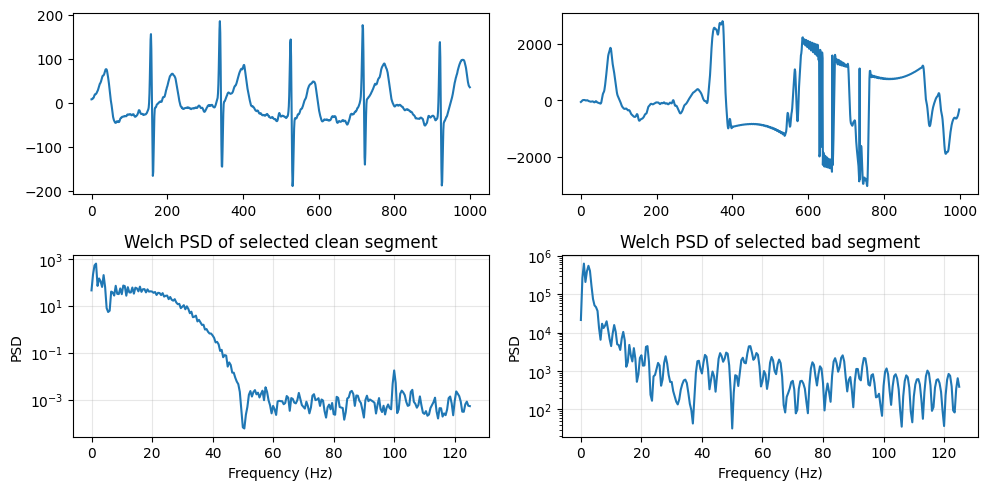

Clean segment bandpower after filter:
  Pin  (0.5-40 Hz): 521.9739043645143
  Pout (45-100 Hz) : 0.11782465608976371
  Pout/Pin ratio : 0.0002257290165362022
bad segment bandpower after filter:
  Pin  (0.5-40 Hz): 30986.92331216558
  Pout (45-100 Hz) : 61035.78521776285
  Pout/Pin ratio : 1.9697271846863214


In [10]:
ecg_selected = ecg_raw[7500:8500]
ecg_bad = ecg_raw[800:1800]

fs = 250
in_band = (15, 40.0)
out_band = (45.0, 100.0)

res_selected = utils.compute_ecg_bandpowers(ecg_selected, fs, in_band, out_band, nperseg_sec=2, noverlap_ratio=0.8, apply_qc_filter=True)
res_bad = utils.compute_ecg_bandpowers(ecg_bad, fs, in_band, out_band, nperseg_sec=2, noverlap_ratio=0.8, apply_qc_filter=True)


# Plot PSD (log scale)
plt.figure(figsize=(10,7))

plt.subplot(3,2,1); plt.plot(res_selected['ecg_used'])
plt.subplot(3,2,2); plt.plot(res_bad['ecg_used'])

plt.subplot(3,2,3)
plt.semilogy(res_selected['f'], res_selected['Pxx']); plt.title(f"Welch PSD of selected clean segment"); plt.xlabel("Frequency (Hz)"); plt.ylabel("PSD"); plt.grid(True, alpha=0.3)

plt.subplot(3,2,4)
plt.semilogy(res_bad['f'], res_bad['Pxx']); plt.title(f"Welch PSD of selected bad segment"); plt.xlabel("Frequency (Hz)"); plt.ylabel("PSD"); plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



print("Clean segment bandpower after filter:"); print("  Pin  (0.5-40 Hz):", res_selected['P_in']); print("  Pout (45-100 Hz) :", res_selected['P_out']); print("  Pout/Pin ratio :", res_selected['ratio'])
print('=='*30)
print('=='*30)
# print("bad segment bandpower:"); print("  Pin  (0.5-40 Hz):", Pin_bad_raw); print("  Pout (45-100 Hz) :", Pout_bad_raw); print("  Pout/Pin ratio :", ratio_bad_raw)
# print('=='*30)
print("bad segment bandpower after filter:"); print("  Pin  (0.5-40 Hz):", res_bad['P_in']); print("  Pout (45-100 Hz) :", res_bad['P_out']); print("  Pout/Pin ratio :", res_bad['ratio'])


# General

In [ ]:
# def _runs_of_true(mask: np.ndarray):
#     """Return list of (start, end) index pairs for contiguous True regions. end is exclusive."""
#     mask = np.asarray(mask, dtype=bool)
#     if mask.size == 0:
#         return []
#     diff = np.diff(mask.astype(np.int8))
#     starts = np.where(diff == 1)[0] + 1
#     ends   = np.where(diff == -1)[0] + 1
#     if mask[0]:
#         starts = np.r_[0, starts]
#     if mask[-1]:
#         ends = np.r_[ends, mask.size]
#     return list(zip(starts.tolist(), ends.tolist()))


# def detect_bad_segments_hf_energy(
#     ecg_raw: np.ndarray,
#     fs: float,
#     out_band=(45.0, 100.0),

#     # PSD windowing
#     win_sec: float = 6.0,
#     step_sec: float = 1.0,
#     nperseg_sec: float = 2.0,
#     pad_sec: float = 0.2,

#     # Thresholding (PSD)
#     thr_method: str = "robust",   # "robust" or "fixed"
#     thr_fixed: float | None = None,
#     thr_alpha: float = 6.0,       # thr = median + alpha*MADscale (for robust)

#     # Optional QC filtering
#     apply_qc_filter: bool = True,
#     hp: float = 0.5,
#     notch_hz: float | None = 50.0,  # set 60.0 if needed; set None to disable
#     notch_q: float = 30.0,

#     # Glitch (sample-level outliers, local median/MAD)
#     k_amp: float = 15.0,             # bigger than 10 usually safer for ECG
#     glitch_win_sec: float = 10.0,    # <-- requested: 10 seconds window for median/MAD
#     glitch_step_sec: float = 1.0,    # how often you recompute local median/MAD
#     pad_glitch_sec: float = 0.05,    # 50 ms padding around detected outlier samples
#     min_glitch_len_sec: float = 0.02   # 20ms, remove shorter glitch runs

# ):
#     """
#     PSD-based bad detection (window-level) + glitch detection (sample-level outliers)
#     where glitch thresholds are computed on separate windows (default 10s).
#     """
#     x = np.asarray(ecg_raw, dtype=float)
#     n = x.size
#     if n == 0:
#         return np.zeros(0, dtype=bool), [], {}

#     # QC filter for stability
#     if apply_qc_filter:
#         x_qc = ecg_qc_filter(x, fs=fs, hp=hp, notch_hz=notch_hz, notch_q=notch_q)
#     else:
#         x_qc = x

#     # ---------------- PSD branch ----------------
#     nyq = 0.5 * fs
#     out_lo, out_hi = out_band
#     out_hi = min(out_hi, nyq * 0.999)
#     if not (0 < out_lo < out_hi < nyq):
#         raise ValueError(f"out_band invalid for fs={fs}: out_band={(out_lo, out_hi)}, nyq={nyq}")

#     win = int(round(win_sec * fs))
#     step = int(round(step_sec * fs))
#     pad = int(round(pad_sec * fs))
#     if win < 8 or step < 1:
#         raise ValueError("win_sec/step_sec too small for given fs.")

#     nperseg = int(round(nperseg_sec * fs))
#     nperseg = max(32, min(nperseg, win))
#     noverlap = int(0.5 * nperseg)

#     starts = np.arange(0, n - win + 1, step, dtype=int)
#     centers = starts + win // 2
#     Pouts = np.zeros_like(starts, dtype=float)

#     for i, s in enumerate(starts):
#         seg = x_qc[s:s+win]
#         f, Pxx = welch(seg, fs=fs, nperseg=nperseg, noverlap=noverlap, detrend="constant")
#         Pouts[i] = bandpower_from_psd(f, Pxx, (out_lo, out_hi))

#     # PSD threshold
#     if thr_method == "fixed":
#         if thr_fixed is None:
#             raise ValueError("thr_fixed must be provided when thr_method='fixed'")
#         thr = float(thr_fixed)
#     elif thr_method == "robust":
#         medP = np.median(Pouts)
#         madP = np.median(np.abs(Pouts - medP))
#         scaleP = 1.4826 * madP
#         if scaleP < 1e-12:
#             scaleP = np.std(Pouts) + 1e-12
#         thr = float(medP + thr_alpha * scaleP)
#     else:
#         raise ValueError("thr_method must be 'robust' or 'fixed'")

#     bad_win = Pouts > thr

#     bad_mask_psd = np.zeros(n, dtype=bool)
#     for s, is_bad in zip(starts, bad_win):
#         if is_bad:
#             s2 = max(0, s - pad)
#             e2 = min(n, s + win + pad)
#             bad_mask_psd[s2:e2] = True

#     # ---------------- Glitch branch (10s local median/MAD) ----------------
#     glitch_mask = np.zeros(n, dtype=bool)

#     gwin = int(round(glitch_win_sec * fs))
#     gstep = int(round(glitch_step_sec * fs))
#     if gwin < 8 or gstep < 1:
#         raise ValueError("glitch_win_sec/glitch_step_sec too small for given fs.")

#     gstarts = np.arange(0, n - gwin + 1, gstep, dtype=int)

#     for s in gstarts:
#         seg_amp = x_qc[s:s+gwin]
#         med = np.median(seg_amp)
#         mad = np.median(np.abs(seg_amp - med))
#         scale = 1.4826 * mad
#         if scale < 1e-12:
#             scale = np.std(seg_amp) + 1e-12

#         thr_amp = k_amp * scale

#         local_outliers = np.abs(seg_amp - med) > thr_amp
#         glitch_mask[s:s+gwin] |= local_outliers


#     # --- Remove too-short glitch runs (min_glitch_len_sec) ---
#     min_glitch_len = int(round(min_glitch_len_sec * fs))
#     min_glitch_len = max(1, min_glitch_len)
#     if glitch_mask.any() and min_glitch_len > 1:
#         glitch_mask_filt = np.zeros(n, dtype=bool)
#         for s_run, e_run in _runs_of_true(glitch_mask):
#             if (e_run - s_run) >= min_glitch_len:
#                 glitch_mask_filt[s_run:e_run] = True
#         glitch_mask = glitch_mask_filt

#     # glitch padding (separate from PSD padding)
#     pad_glitch = int(round(pad_glitch_sec * fs))
#     if pad_glitch > 0 and glitch_mask.any():
#         padded = glitch_mask.copy()
#         for s, e in _runs_of_true(glitch_mask):
#             s2 = max(0, s - pad_glitch)
#             e2 = min(n, e + pad_glitch)
#             padded[s2:e2] = True
#         glitch_mask = padded

#     # ---------------- Final combine ----------------
#     bad_mask = bad_mask_psd | glitch_mask
#     bad_segments = _runs_of_true(bad_mask)

#     info = {
#         "starts": starts,
#         "centers": centers,
#         "Pout": Pouts,
#         "threshold": thr,
#         "threshold_method": thr_method,
#         "bad_windows": bad_win,
#         "glitch_starts": gstarts,
#         "params": {
#             "out_band": (out_lo, out_hi),
#             "win_sec": win_sec,
#             "step_sec": step_sec,
#             "nperseg_sec": nperseg_sec,
#             "pad_sec": pad_sec,
#             "glitch_win_sec": glitch_win_sec,
#             "glitch_step_sec": glitch_step_sec,
#             "pad_glitch_sec": pad_glitch_sec,
#             "k_amp": k_amp,
#             "apply_qc_filter": apply_qc_filter,
#             "hp": hp,
#             "notch_hz": notch_hz,
#             "notch_q": notch_q,
#         }
#     }
#     return bad_mask, bad_segments, info

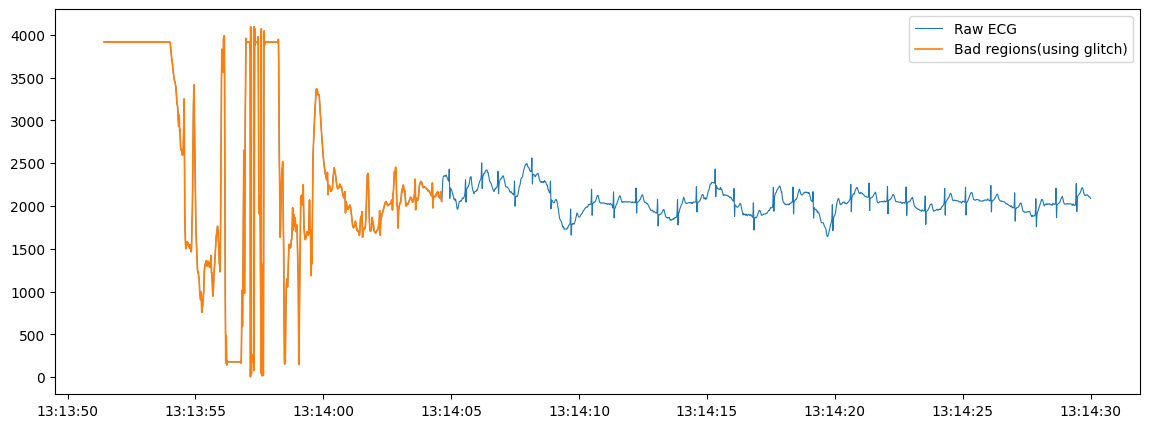

2562
1661
2039.0


dict_keys(['Pout', 'threshold', 'bad_mask_psd', 'bad_mask_glitch', 'bad_segments_psd', 'bad_segments_glitch', 'bad_mask_psd_only', 'bad_mask_glitch_only', 'bad_mask_both'])

In [11]:
bad_mask, bad_segments, info = utils.detect_bad_segments_hf_energy(
    ecg_raw,
    fs=250,
    out_band=(45.0, 100.0),
    win_sec = 6.0,
    thr_method = "robust"
)

ecg_bad = np.full_like(ecg_raw, np.nan, dtype=float)
# ecg_bad[bad_mask] = ecg_raw[bad_mask]
ecg_bad[info['bad_mask_psd_only']] = ecg_raw[info['bad_mask_psd_only']]
# ecg_bad[bad_mask] = ecg_raw[bad_mask]


plt.figure(figsize=(14,5))
plt.plot(ecg_time, ecg_raw, linewidth=0.8, label="Raw ECG")
ecg_bad[info['bad_mask_psd']] = ecg_raw[info['bad_mask_psd']]
# plt.plot(ecg_time, ecg_bad, linewidth=1.2, label="Bad regions(using PSD)")
ecg_bad[info['bad_mask_glitch']] = ecg_raw[info['bad_mask_glitch']]
plt.plot(ecg_time, ecg_bad, linewidth=1.2, label="Bad regions(using glitch)")
plt.legend();plt.show()

print(ecg_raw[4000:5000].max())
print(ecg_raw[4000:5000].min())
print(np.median(ecg_raw[4000:5000]))

info.keys()

# o

In [ ]:
# def load_pkl_from_zip(z, file_name):
#     # Read a single .pkl member from an already-open ZipFile object
#     with z.open(file_name) as f:
#         data = pickle.load(f)
#     return data


# def plot_ecg_with_bad_from_zip(zip_path, n_files=7, start_idx=0, fs=250):
#   durations = []
#   contents = []
#   i = 1

#   with zipfile.ZipFile(zip_path, 'r') as z:
#     contents = z.namelist()

#     selected = contents[start_idx : start_idx + n_files]
#     fig, axes = plt.subplots(n_files, 1, figsize=(14, 2.2*n_files), sharex=False)

#     for (ax, name) in zip(axes, selected):
#       data = load_pkl_from_zip(z,name)
#       ecg_raw = data['zephyr']['ECG']['EcgWaveform']
#       ecg_time = data['zephyr']['ECG']['Time']
#       ecg_time = pd.to_datetime(ecg_time)

#       bad_mask, bad_segments, info = detect_bad_segments_hf_energy(ecg_raw, fs=250, thr_method = "robust", k_amp = 10, pad_glitch_sec=0.1, min_glitch_len_sec=0.2, glitch_win_sec=10.0)

#       ecg_bad = np.full_like(ecg_raw, np.nan, dtype=float)
#       ecg_bad[bad_mask] = ecg_raw[bad_mask]

#       ax.plot(ecg_time, ecg_raw, lw=0.8, label="Raw ECG")
#       ax.plot(ecg_time, ecg_bad, lw=1.2, label="Bad regions")
#       ax.legend(loc="upper right")
#       # show only time on x-axis
#       ax.xaxis.set_major_locator(mdates.AutoDateLocator(minticks=3, maxticks=6))
#       ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

#       # optional: title with file name
#       ax.set_title(name, fontsize=9);ax.grid(True, alpha=0.3)

#     fig.tight_layout()
#     plt.show()



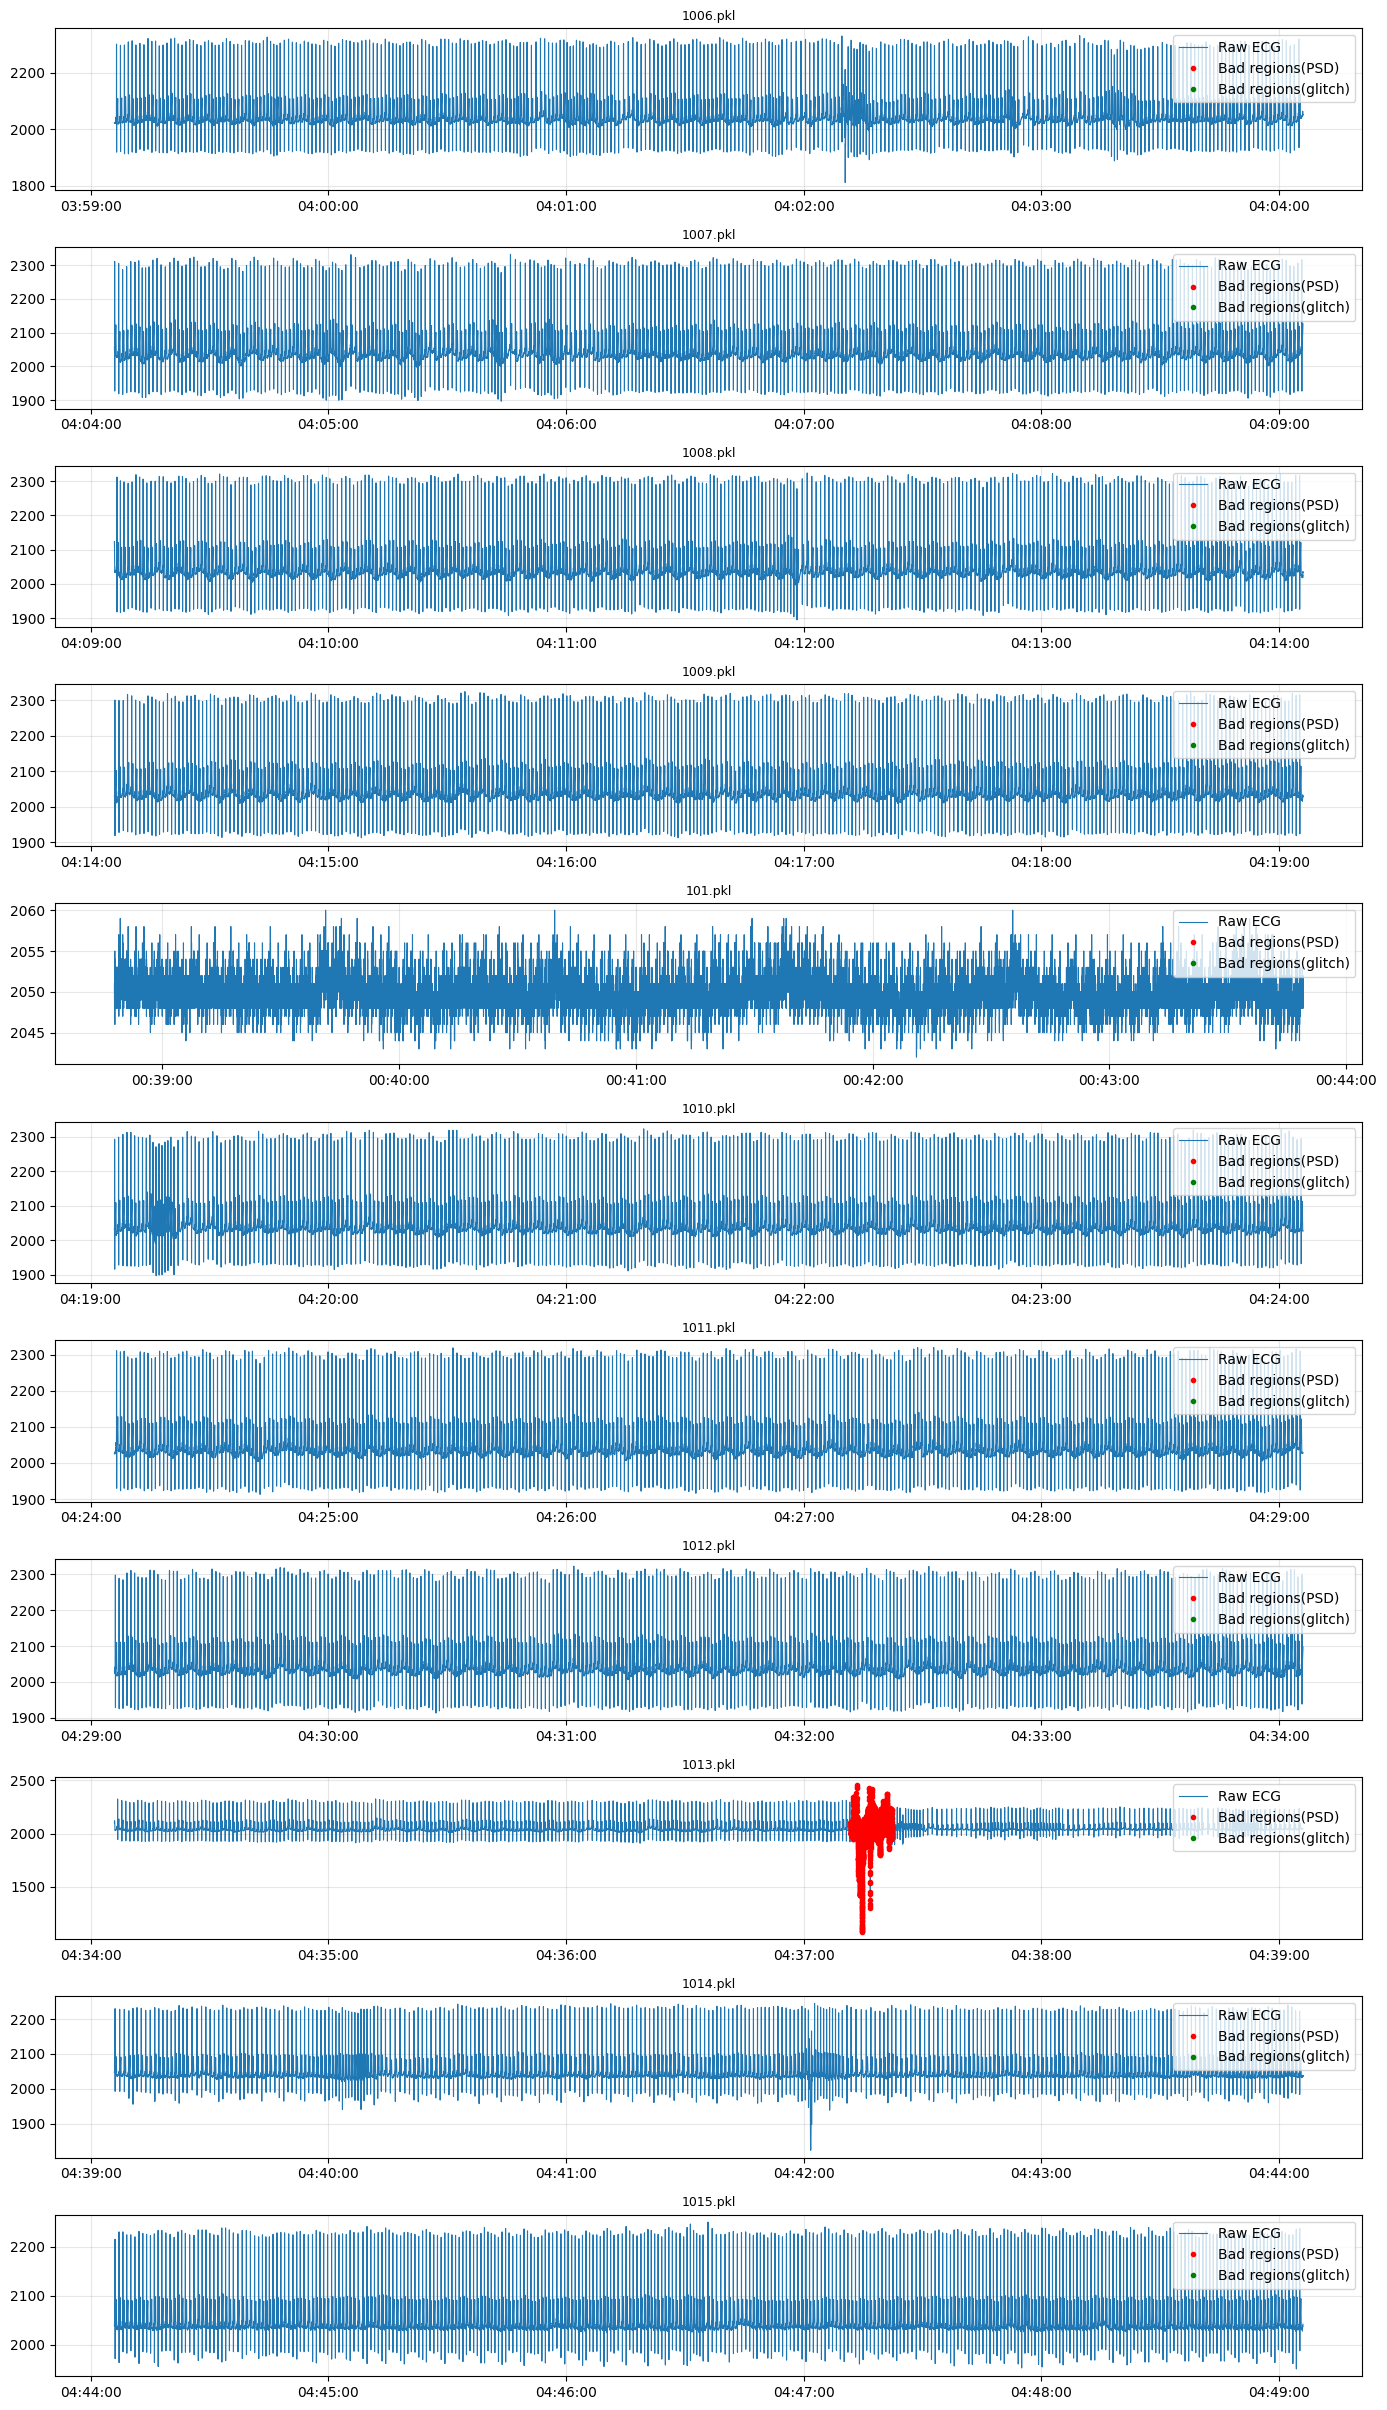

In [12]:
zip_path = "/content/drive/MyDrive/PhysioCGM/c1s01_processed.zip"

fig, axes = utils.plot_ecg_bad_segments_from_zip(
    zip_path,
    n_files=11,
    start_idx=10,
    fs=250,
    detector_kwargs=dict(
        thr_method="robust",
        k_amp=10,
        pad_glitch_sec=0.1,
        min_glitch_len_sec=0.2,
        glitch_win_sec=10.0,
    ),
    keep_sources=True,
)


((301,), (75250,))

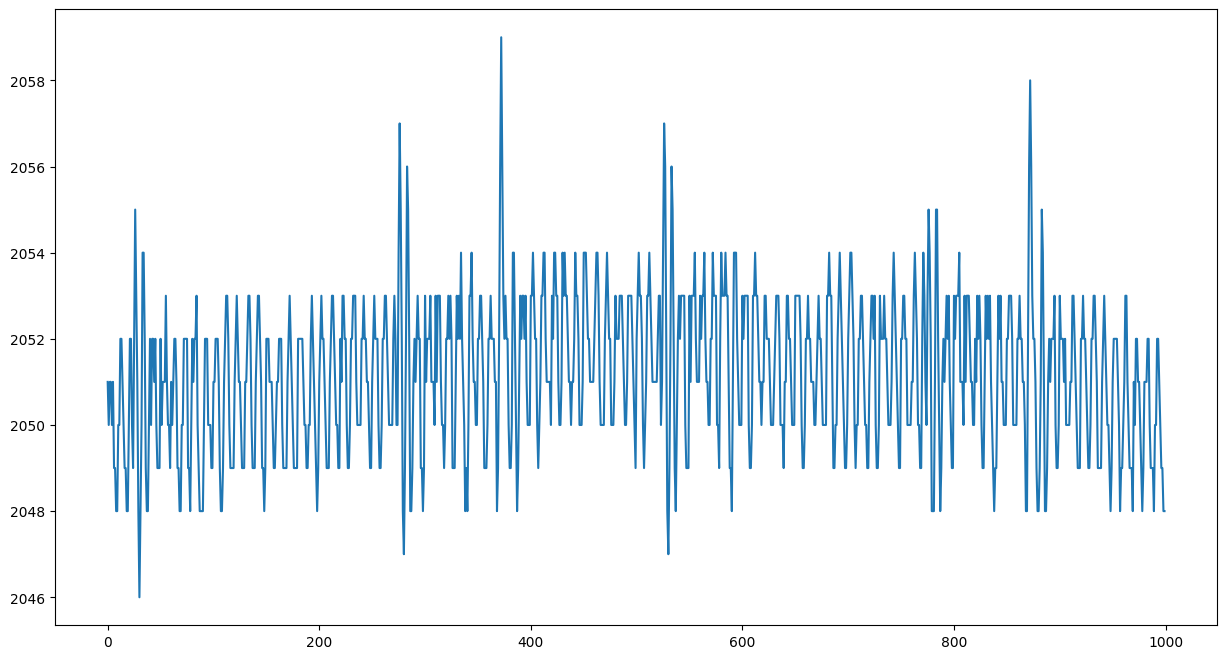

In [13]:
with zipfile.ZipFile(zip_path, 'r') as z:
    with z.open("101.pkl", "r") as f:
        data = pickle.load(f)   # load directly from ZIP


ecg_raww = data['zephyr']['ECG']['EcgWaveform']
ecg_time = data['zephyr']['ECG']['Time']
ecg_noise = data['zephyr']['Summary']['ECGNoise']
ecg_noise_time = data['zephyr']['Summary']['Time']
# ecg_time
# ecg_time
# ecg = bandpass(ecg_raww, 250, 0.5, 40)
# ecg_raww_2 = ecg_raww

plt.figure(figsize=(15,8))
# plt.subplot(3,1,1);
plt.plot(ecg_raww[:1000])
# plt.subplot(3,1,2);plt.plot(ecg_raww[4000:])
# plt.subplot(3,1,3);plt.plot(ecg[4000:4500])
# ecg_time

ecg_noise_time.shape, ecg_time.shape

In [ ]:
x = np.asarray(ecg_raw)
u = np.unique(x)
print("dtype:", x.dtype)
print("min/max:", x.min(), x.max())
print("unique count:", len(u))
print("first 20 unique:", u[:20])


In [ ]:
import numpy as np
import pandas as pd

def bad_mask_from_zephyr_summary(
    data: dict,
    *,
    hr_conf_good: float = 100.0,
    ecg_noise_max: float = 0.001,
    treat_outside_as_bad: bool = True,
):
    """
    Build sample-level bad_mask for ECG using Zephyr BioHarness Summary fields:
      - HRConfidence (1 Hz)
      - ECGNoise (1 Hz)

    Paper-style rule (common):
      good_sec = (HRConfidence == 100) & (ECGNoise < 0.001)
      bad_sec = ~good_sec

    Returns
    -------
    bad_mask : (n,) bool
        True for ECG samples considered bad.
    bad_segments : list[(start,end)]
        Contiguous bad regions in sample indices (end exclusive).
    info : dict
        Contains thresholds + second-level masks for debugging.
    """
    # --- Extract ECG waveform and its timestamps ---
    ecg_raw = np.asarray(data["zephyr"]["ECG"]["EcgWaveform"])
    ecg_time = pd.to_datetime(data["zephyr"]["ECG"]["Time"])
    n = len(ecg_raw)
    if n == 0:
        return np.zeros(0, dtype=bool), [], {}

    # --- Extract Summary (1 Hz) and its timestamps ---
    summ = data["zephyr"]["Summary"]
    sum_time = pd.to_datetime(summ["Time"])

    # Names in your file are: HRConfidence, ECGNoise (as you showed)
    hr_conf = np.asarray(summ["HRConfidence"], dtype=float)
    ecg_noise = np.asarray(summ["ECGNoise"], dtype=float)

    # --- Build second-level good/bad (length m = number of seconds) ---
    good_sec = (hr_conf == hr_conf_good) & (ecg_noise < ecg_noise_max)
    bad_sec = ~good_sec

    # --- Map each ECG sample time to the corresponding Summary second ---
    # Convert times to int64 nanoseconds for fast searchsorted
    ecg_ns = ecg_time.view("int64")
    sum_ns = sum_time.view("int64")

    # For each ecg timestamp, find the index of the last summary timestamp <= it
    idx = np.searchsorted(sum_ns, ecg_ns, side="right") - 1

    print(idx.shape)
    print(bad_sec.shape)
    print('-'*20)
    print(n)

    # Handle samples that fall before first summary timestamp or after last
    bad_mask = np.zeros(n, dtype=bool)

    inside = (idx >= 0) & (idx < len(bad_sec))
    bad_mask[inside] = bad_sec[idx[inside]]

    if treat_outside_as_bad:
        bad_mask[~inside] = True
    else:
        bad_mask[~inside] = False

    # --- Convert bad_mask to contiguous segments (start,end) ---
    bad_segments = []
    if bad_mask.any():
        diff = np.diff(bad_mask.astype(np.int8))
        starts = np.where(diff == 1)[0] + 1
        ends   = np.where(diff == -1)[0] + 1
        if bad_mask[0]:
            starts = np.r_[0, starts]
        if bad_mask[-1]:
            ends = np.r_[ends, n]
        bad_segments = list(zip(starts.tolist(), ends.tolist()))

    info = {
        "hr_conf_good": hr_conf_good,
        "ecg_noise_max": ecg_noise_max,
        "sum_time": sum_time,
        "good_sec": good_sec,
        "bad_sec": bad_sec,
        "idx_map": idx,  # for debugging
    }
    return bad_mask, bad_segments, info


# ---------------- Example usage ----------------
# data = pickle.load(...)  # one pkl dict

with zipfile.ZipFile(zip_path, 'r') as z:
    with z.open("10.pkl", "r") as f:
        data = pickle.load(f)   # load directly from ZIP

        bad_mask, bad_segments, info = bad_mask_from_zephyr_summary(data)

# Overlay plot example:
ecg_rawww = np.asarray(data["zephyr"]["ECG"]["EcgWaveform"])
ecg_time = pd.to_datetime(data["zephyr"]["ECG"]["Time"])
ecg_bad = np.full_like(ecg_rawww, np.nan, dtype=float)
ecg_bad[bad_mask] = ecg_rawww[bad_mask]
# plt.figure(figsize=(14,4))
# plt.plot(ecg_time, ecg_rawww, lw=0.8, alpha=0.35, label="Raw ECG")
# plt.plot(ecg_time, ecg_bad, lw=1.1, label="Bad (Summary)")
# plt.legend(); plt.grid(True, alpha=0.3); plt.tight_layout(); plt.show()

print("len(ecg_raw):", len(ecg_rawww))
print("len(bad_mask):", len(bad_mask))
print("len(ecg_time):", len(ecg_time))
print("len(ecg_time):", len(ecg_bad))

ecg_noise = np.asarray(data["zephyr"]["Summary"]["ECGNoise"])
ecg_noise.min(), ecg_noise.max()


In [ ]:
with zipfile.ZipFile(zip_path, 'r') as z:
    with z.open("2000.pkl", "r") as f:
        data = pickle.load(f)   # load directly from ZIP


ecg_raww = data['zephyr']['ECG']['EcgWaveform']
ecg_time = data['zephyr']['ECG']['Time']
ecg_noise = data['zephyr']['Summary']['ECGNoise']
ecg_noise_time = data['zephyr']['Summary']['Time']
# ecg_time
# ecg_time
# ecg = bandpass(ecg_raww, 250, 0.5, 40)
# ecg_raww_2 = ecg_raww

# plt.figure(figsize=(10,7))
plt.subplot(3,1,1);plt.plot(ecg_raww)
# plt.subplot(3,1,2);plt.plot(ecg_raww[4000:])
# plt.subplot(3,1,3);plt.plot(ecg[4000:4500])
# ecg_time

ecg_noise_time.shape, ecg_time.shape

# چرت و پرت

In [ ]:
def get_rpeaks_neurokit(ecg_raw, fs, correct_artifacts=True, method="neurokit"):
    # Clean the raw ECG signal (bandpass/denoise depending on method)
    ecg_cleaned = nk.ecg_clean(ecg_raw, sampling_rate=fs, method=method)

    # Detect R-peaks on the cleaned signal
    # Returns a DataFrame of peak signals and an info dict containing indices
    peaks_df, info = nk.ecg_peaks(
        ecg_cleaned,
        sampling_rate=fs,
        method=method,
        correct_artifacts=correct_artifacts
    )

    # R-peak sample indices (0-based indices into the ECG array)
    rpeaks = info["ECG_R_Peaks"]

    return ecg_cleaned, rpeaks, info

In [ ]:
ecg_raw2 = ecg[4000 : 4500]
ecg_cleaned, rpeaks, info = get_rpeaks_neurokit(ecg_raw2, 250)

print("Number of R-peaks:", len(rpeaks))
print("First 10 peak indices:", rpeaks[:10])

# Optional: quick visual check (first 10 seconds)
sec = 10
n = int(sec * 250)
plt.figure()
plt.plot(ecg_cleaned[:n])
# plt.scatter(rpeaks[rpeaks < n], ecg_cleaned[rpeaks[rpeaks < n]])
plt.title("ECG Cleaned + R-peaks (first 10s)")
plt.show()